In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("C:/Users/chand/Downloads/Titanic/Titanic-Dataset.csv", usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 20, random_state = 42)

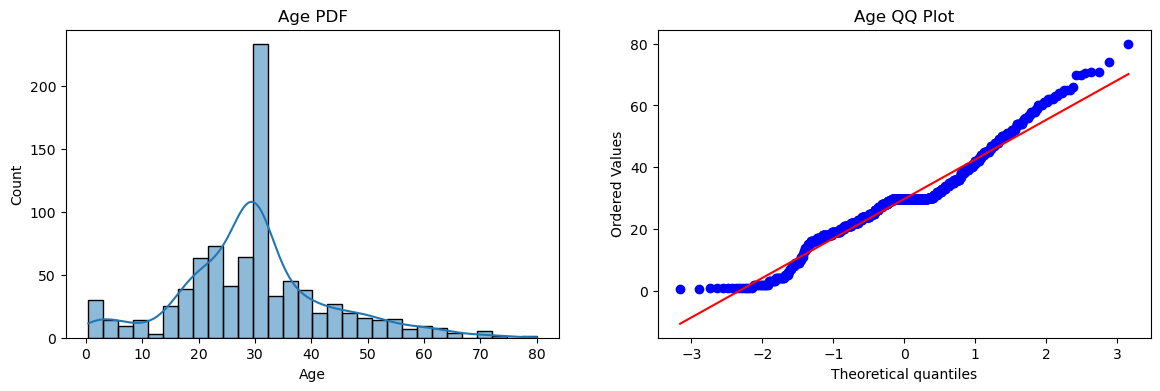

In [10]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde = True, fill = True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = "norm", plot = plt)
plt.title('Age QQ Plot')

plt.show()

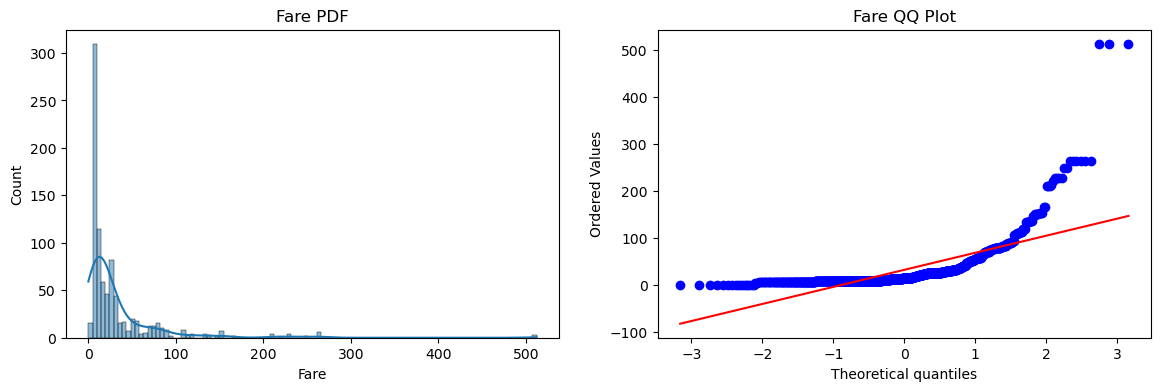

In [11]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde = True, fill = True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = "norm", plot = plt)
plt.title('Fare QQ Plot')

plt.show()

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.55
Accuracy DT 0.45


In [19]:
trf = FunctionTransformer(func = np.log1p)

In [20]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [23]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6
Accuracy DT 0.5


In [27]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf,X_transformed, y,scoring = 'accuracy',cv=10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed, y,scoring = 'accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610736579275904


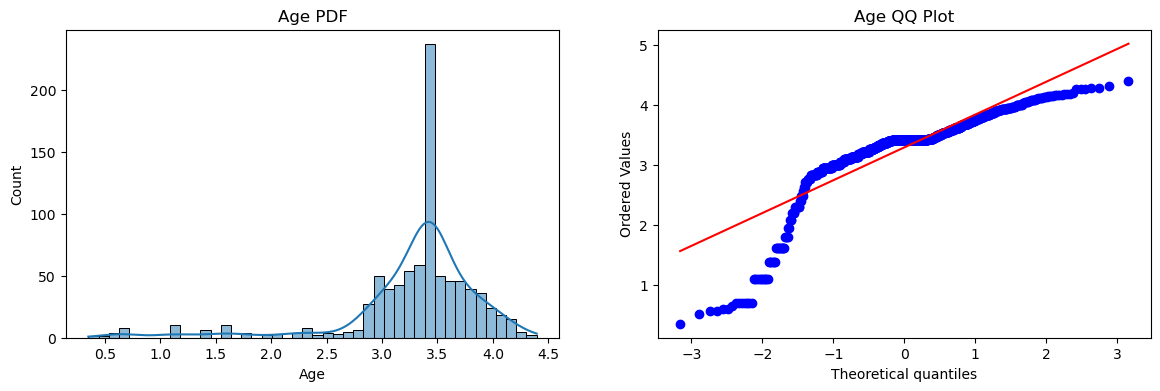

In [29]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train_transformed['Age'], kde = True, fill = True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = "norm", plot = plt)
plt.title('Age QQ Plot')

plt.show()

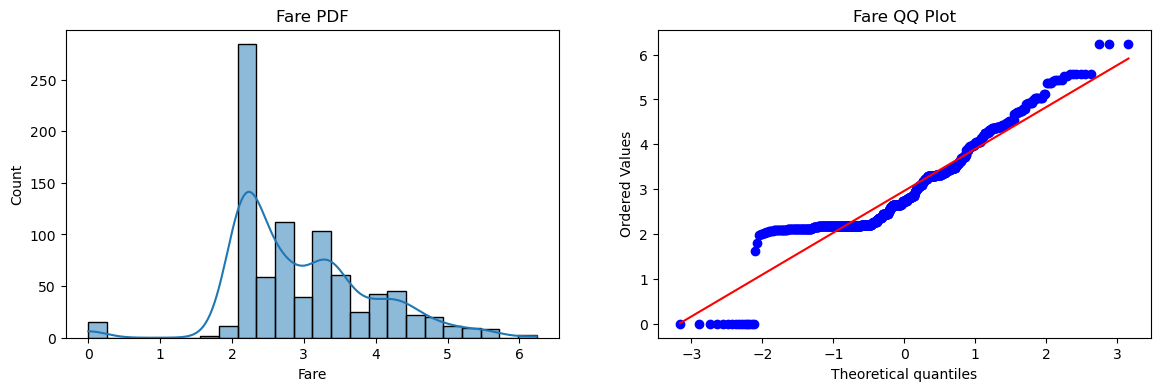

In [30]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train_transformed['Fare'], kde = True, fill = True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = "norm", plot = plt)
plt.title('Fare QQ Plot')

plt.show()